Loading ../data/raw/raw_fighters.csv...


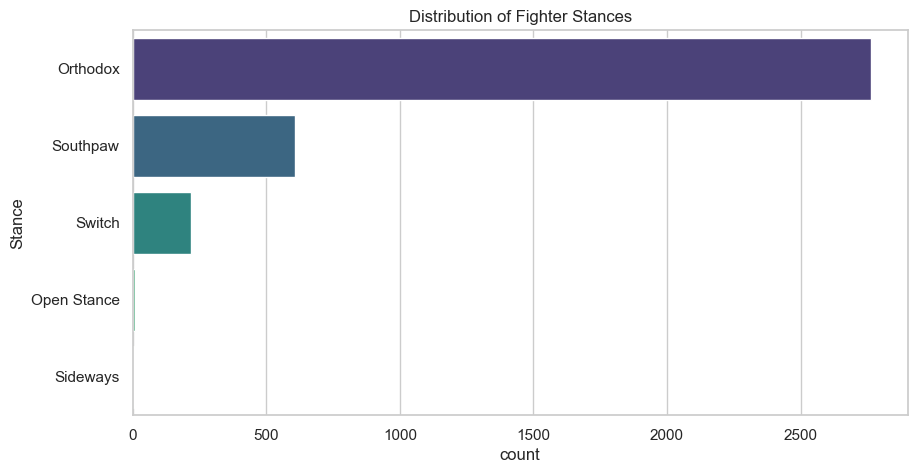

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


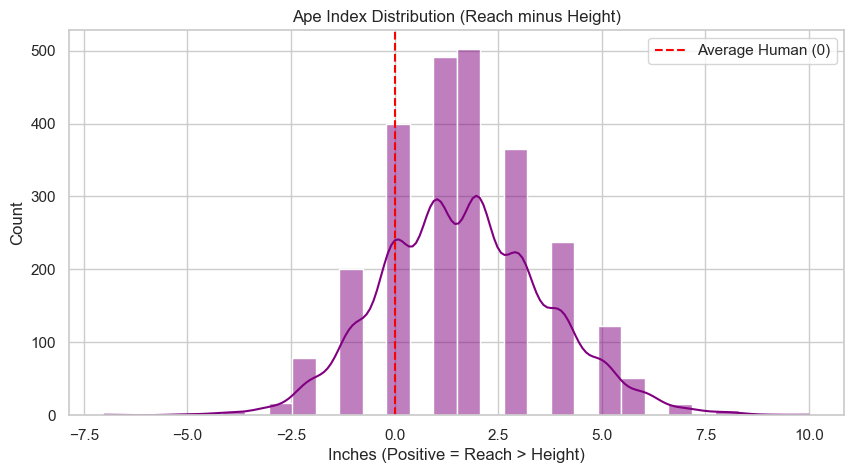


Loading ../data/external/fighters_stats.csv...


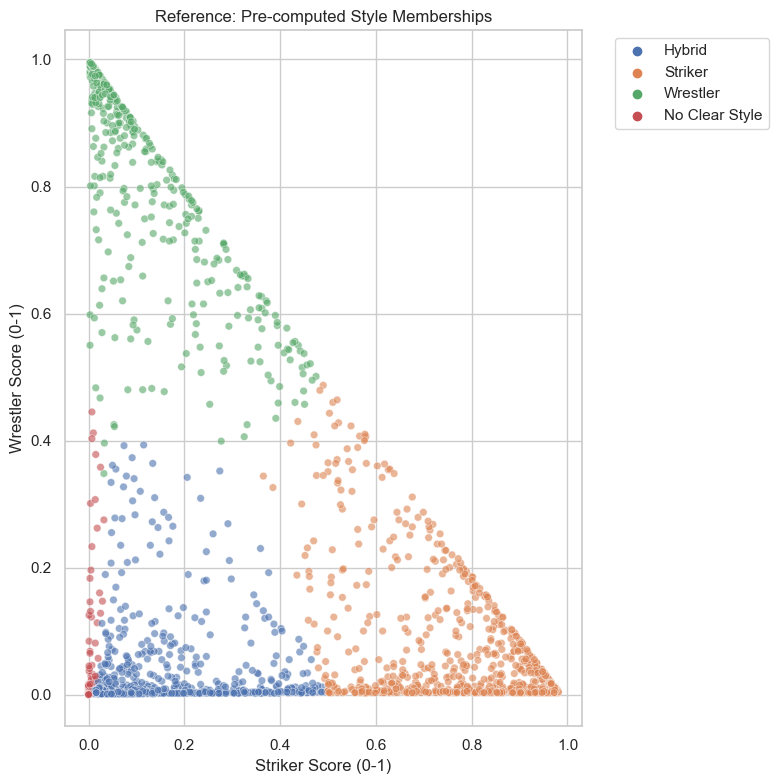

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Config
RAW_FIGHTERS_PATH = '../data/raw/raw_fighters.csv'
EXTERNAL_STATS_PATH = '../data/external/fighters_stats.csv'

sns.set_theme(style="whitegrid")

# ANALYSIS 1: Physicality (from raw_fighters.csv)
print(f"Loading {RAW_FIGHTERS_PATH}...")
if os.path.exists(RAW_FIGHTERS_PATH):
    df_fighters = pd.read_csv(RAW_FIGHTERS_PATH)
    
    # Helper functions for cleaning
    def clean_height(h_str):
        # Converts height to inches
        if pd.isna(h_str) or str(h_str).strip() == '--': return None
        try:
            clean = str(h_str).replace('"', '').replace("'", "")
            parts = clean.split() 
            # Handle "5 11" format if split by space, or just raw inches if float
            if len(parts) >= 2:
                return int(parts[0]) * 12 + int(parts[1])
            return float(clean)
        except:
            return None

    def clean_reach(r_str):
        if pd.isna(r_str) or str(r_str).strip() == '--': return None
        try:
            return float(str(r_str).replace('"', '').replace("'", ""))
        except:
            return None

    # Apply cleaning
    df_fighters['Height_Inches'] = df_fighters['Ht.'].apply(clean_height)
    df_fighters['Reach_Inches'] = df_fighters['Reach'].apply(clean_reach)
    
    # Calculate Ape Index (Reach - Height)
    df_fighters['Ape_Index'] = df_fighters['Reach_Inches'] - df_fighters['Height_Inches']

    # Plot Stance Distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(y='Stance', data=df_fighters, 
                  order=df_fighters['Stance'].value_counts().index, palette='viridis')
    plt.title("Distribution of Fighter Stances")
    plt.show()

    # Plot Ape Index Distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df_fighters['Ape_Index'].dropna(), bins=30, color='purple', kde=True)
    plt.axvline(0, color='red', linestyle='--', label='Average Human (0)')
    plt.title("Ape Index Distribution (Reach minus Height)")
    plt.xlabel("Inches (Positive = Reach > Height)")
    plt.legend()
    plt.show()
else:
    print(f"File not found: {RAW_FIGHTERS_PATH}")

# ANALYSIS 2: Reference Styles (from fighters_stats.csv)
print(f"\nLoading {EXTERNAL_STATS_PATH}...")
if os.path.exists(EXTERNAL_STATS_PATH):
    df_stats = pd.read_csv(EXTERNAL_STATS_PATH)
    
    # Check if the "Membership" columns exist
    style_cols = ['Striker_Membership', 'Wrestler_Membership']
    
    if all(col in df_stats.columns for col in style_cols):
        plt.figure(figsize=(8, 8))
        
        # Color by 'Fighting Style' if available, otherwise just blue
        hue = 'Fighting Style' if 'Fighting Style' in df_stats.columns else None
        
        sns.scatterplot(data=df_stats, x='Striker_Membership', y='Wrestler_Membership', 
                        hue=hue, alpha=0.6, s=30)
        
        plt.title("Reference: Pre-computed Style Memberships")
        plt.xlabel("Striker Score (0-1)")
        plt.ylabel("Wrestler Score (0-1)")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("Style membership columns (Striker_Membership, etc.) not found in this file.")
else:
    print(f"File not found: {EXTERNAL_STATS_PATH}")